In [89]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf

In [90]:
data=pd.read_csv("TATAMOTORS.NS.csv")
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     25-12-1995   72.819626   72.819626   72.819626   72.819626   53.472767   
1     26-12-1995   72.819626   72.819626   72.819626   72.819626   53.472767   
2     27-12-1995   72.819626   72.819626   72.819626   72.819626   53.472767   
3     28-12-1995   72.819626   72.819626   72.819626   72.819626   53.472767   
4     29-12-1995   72.819626   72.819626   72.819626   72.819626   53.472767   
...          ...         ...         ...         ...         ...         ...   
6809  06-01-2023  386.100006  388.399994  381.000000  382.000000  382.000000   
6810  09-01-2023  386.350006  392.700012  385.000000  389.450012  389.450012   
6811  10-01-2023  400.000000  417.750000  400.000000  412.899994  412.899994   
6812  11-01-2023  415.750000  420.000000  413.549988  418.200012  418.200012   
6813  12-01-2023  420.299988  420.500000  410.049988  412.250000  412.250000   

          Volume  
0            0.0  
1

In [91]:
start_date='1999-01-01'
end_date='2023-01-30'
ticker='TATAMOTORS.NS'
df=yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,31.599886,32.155613,31.053738,31.839424,24.766428,18835718
1999-01-04,32.021473,32.663437,31.561560,31.676538,24.639725,18245781
1999-01-05,31.714865,34.215645,31.283695,34.215645,26.614779,38938718
1999-01-06,34.637230,35.317520,33.870708,35.221703,27.397345,40059886
1999-01-07,35.269611,36.850563,35.164215,36.697258,28.545115,35983032


In [97]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())  # This will show the count of missing values in each column

Missing values:
Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64


In [98]:
# Handle missing values (dropping rows with missing values)
df = data.dropna()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6807 entries, 0 to 6813
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6807 non-null   object 
 1   Open       6807 non-null   float64
 2   High       6807 non-null   float64
 3   Low        6807 non-null   float64
 4   Close      6807 non-null   float64
 5   Adj Close  6807 non-null   float64
 6   Volume     6807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 425.4+ KB


In [100]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6.807000e+03
mean,186.517631,189.378873,183.296930,186.218979,179.329666,1.531822e+07
std,154.675953,156.520059,152.523007,154.422413,157.913659,2.070026e+07
min,11.114574,11.631977,11.028340,11.267879,9.099408,0.000000e+00
25%,61.225975,62.305689,59.740839,60.996019,47.993334,5.196782e+06
50%,138.100006,141.327560,135.500000,137.974030,126.174965,9.300612e+06
75%,296.335831,300.985351,291.536301,296.049576,294.175003,1.711066e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


In [101]:
print("Mean of Closing price:",df['Close'].mean())
print("Median od Closeing price:",df['Close'].median())
print("Standard deviation of Closing price:",df['Close'].std())
print("Maximum value of Closing price:",df['Close'].max())
print("Minimum value of Closing price:",df['Close'].min())

Mean of Closing price: 186.2189787677394
Median od Closeing price: 137.97403
Standard deviation of Closing price: 154.4224130169949
Maximum value of Closing price: 598.134399
Minimum value of Closing price: 11.267879


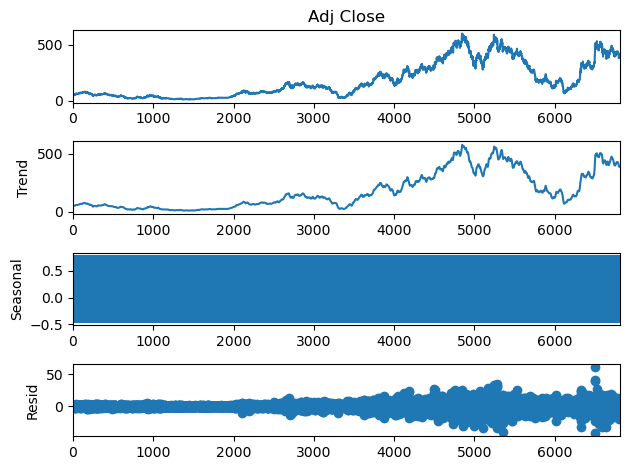

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["Adj Close"], model="additive",period=12)
decomposition.plot()
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df["Adj Close"])
print(f"p-value: {adf_result[0]}")

# Apply differencing if necessary (if p-value > 0.05)
if adf_result[0] > 0.05:
    data = data["Adj Close"].diff().dropna()
    adf_result = adfuller(data)
    print(f"p-value after differencing: {adf_result[0]}")

p-value: -1.261890239222018


In [106]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [120]:
datetime_column = df['Date']
numerical_data = df.drop('Date', axis=1)


In [121]:
numerical_data

,Open,High,Low,Close,Adj Close,Volume
0,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
2,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
3,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
4,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
...,...,...,...,...,...,...
6809,386.100006,388.399994,381.0,382.0,382.0,8715469.0
6810,386.350006,392.700012,385.0,389.450012,389.450012,14693099.0
6811,400.0,417.75,400.0,412.899994,412.899994,54021379.0
6812,415.75,420.0,413.549988,418.200012,418.200012,22224361.0


In [124]:
from pmdarima.arima import auto_arima

# Assuming numerical_data contains multiple time series, and each time series is in a separate column

for column in numerical_data.columns:
    y = numerical_data[column]  # Selecting a single column (time series)
    
    # Identify optimal ARIMA model parameters for each time series
    model = auto_arima(y, trace=True, error_action="ignore")

    # Print the summary of the best model
    print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43033.888, Time=16.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43034.764, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43036.527, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43036.515, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43033.308, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43036.390, Time=7.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 27.975 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6807
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -21515.654
Date:                Thu, 21 Mar 2024   AIC                          43033.308
Time:                        21:48:36   BIC                          43040.134
Sample:                             0   HQIC                         43035.664
  

In [129]:
# Train the model
model_fit = model.fit(y)
model_fit

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [130]:
# Forecast future values
forecast = model_fit.predict(n_periods=12)
forecast

C:\Users\Prajwal\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


6807    1.805731e+07
6808    1.869988e+07
6809    1.837812e+07
6810    1.817578e+07
6811    1.798104e+07
6812    1.780359e+07
6813    1.764093e+07
6814    1.749193e+07
6815    1.735543e+07
6816    1.723039e+07
6817    1.711583e+07
6818    1.701089e+07
dtype: float64

In [ ]:
**Tata Motors Stock Price Analysis - Summary**

* Data: 1999-01-01 to 2023-01-30 (from yfinance)
* Missing Values: Handled by dropping rows with missing data.
* Descriptive Statistics: Explored mean, median, standard deviation, min/max closing prices.
* Seasonality: Decomposed data using an additive model (period=12). Visualize the plot for insights.
* Stationarity: Performed ADF test. Include p-value to indicate stationarity or differencing applied.
* ARIMA Model: Auto-ARIMA identified optimal parameters for each time series in the data.
* Forecast: Generated 12-month forecast for closing prices. Analyze the forecast for potential trends.